In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

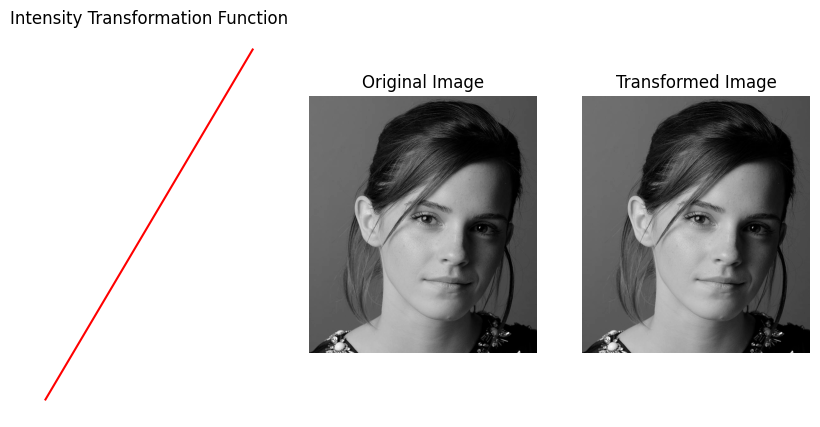

In [10]:
image_path = r"D:\Academics\image_processing\images\emma_watson.jpg"
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

assert f is not None
t = np.arange(256, dtype=np.uint8)

g = t[f]
#g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, "r")
ax[0].set_title("Intensity Transformation Function")
ax[0].axis("off")


ax[1].imshow(f, cmap="gray")
ax[1].set_title("Original Image")
ax[1].axis("off")
ax[2].imshow(g, cmap="gray")
ax[2].set_title("Transformed Image")
ax[2].axis("off")
plt.show()